Construct a DataFrame with missing values in multiple columns. Explore use of isnull(), dropna(), fillna().


In [ ]:
import numpy as np
import pandas as pd

name_score_data = {   
        "Name": ['Alice', 'Bob', 'Charlie', 'David', None],
        'Age': [25, np.nan, 30, 32, 29],
        'City': ['New York', None, 'Los Angeles', 'San Diego', 'Chicago'],
        'Score': [85.5, 92.0, np.nan, 88.0, None]
        }

df = pd.DataFrame(name_score_data)
print(df)
print(df.isnull())

df_no_na = df.dropna()
print(df_no_na)

df_filled = df.fillna({
    'Name': 'Unknown', 
    'Age' : df['Age'].mean(),
    'City': 'Unknown City', 
    'Score': df['Score'].median()
})
print(df_filled)

      Name   Age         City  Score
0    Alice  25.0     New York   85.5
1      Bob   NaN         None   92.0
2  Charlie  30.0  Los Angeles    NaN
3    David  32.0    San Diego   88.0
4     None  29.0      Chicago    NaN
    Name    Age   City  Score
0  False  False  False  False
1  False   True   True  False
2  False  False  False   True
3  False  False  False  False
4   True  False  False   True
    Name   Age       City  Score
0  Alice  25.0   New York   85.5
3  David  32.0  San Diego   88.0
      Name   Age          City  Score
0    Alice  25.0      New York   85.5
1      Bob  29.0  Unknown City   92.0
2  Charlie  30.0   Los Angeles   88.0
3    David  32.0     San Diego   88.0
4  Unknown  29.0       Chicago   88.0



Demonstrate forward fill, backward fill, and interpolation for time-indexed data.


In [11]:
import pandas as pd
import numpy as np

date = pd.date_range(start="4/11/2025", end="4/21/2025", freq='D')

data = {
    'Temperature': [30, np.nan, 32, np.nan, np.nan,35, 36, 38, 42, np.nan, 42 ]
}

df = pd.DataFrame(data, index=date)
print(df)

df_ffill = df.ffill()
print(df_ffill)

df_bfill = df.bfill()
print(df_bfill)

df_interp = df.interpolate()
print(df_interp)


            Temperature
2025-04-11         30.0
2025-04-12          NaN
2025-04-13         32.0
2025-04-14          NaN
2025-04-15          NaN
2025-04-16         35.0
2025-04-17         36.0
2025-04-18         38.0
2025-04-19         42.0
2025-04-20          NaN
2025-04-21         42.0
            Temperature
2025-04-11         30.0
2025-04-12         30.0
2025-04-13         32.0
2025-04-14         32.0
2025-04-15         32.0
2025-04-16         35.0
2025-04-17         36.0
2025-04-18         38.0
2025-04-19         42.0
2025-04-20         42.0
2025-04-21         42.0
            Temperature
2025-04-11         30.0
2025-04-12         32.0
2025-04-13         32.0
2025-04-14         35.0
2025-04-15         35.0
2025-04-16         35.0
2025-04-17         36.0
2025-04-18         38.0
2025-04-19         42.0
2025-04-20         42.0
2025-04-21         42.0
            Temperature
2025-04-11         30.0
2025-04-12         31.0
2025-04-13         32.0
2025-04-14         33.0
2025-04-15      


Drop rows where a subset of columns have missing values.


In [12]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [25, np.nan, 30, 22, 29],
    'City': ['New York', None, 'Los Angeles', 'Chicago', 'Houston'],
    'Score': [85.5, 92.0, np.nan, 88.0, None]
}
df = pd.DataFrame(data)

df_subset_dropped = df.dropna(subset=['Name', 'Score'])
print(df_subset_dropped)


    Name   Age      City  Score
0  Alice  25.0  New York   85.5
1    Bob   NaN      None   92.0
3  David  22.0   Chicago   88.0



Create a function that uses different fill strategies based on column dtype.


In [ ]:
def smart_fill(df):
    filled_copy = df.copy()

    for col in filled_copy:
        if filled_copy[col].dtype == 'object':
            # Object
            filled_copy[col] = filled_copy[col].fillna(filled_copy[col].mode[0])
        elif np.issubdtype(filled_copy[col].dtype, np.number):
            # Numerical Data
            filled_copy[col] = filled_copy[col].fillna(filled_copy[col].median())
        else:
            filled_copy[col] = filled_copy[col].fillna(method='fflll')
    
    return filled_copy


Evaluate how missing data affects statistical summaries and plotting.



In [13]:
# With missing values
print("Original:\n", df.describe())

# After filling
print("\nFilled:\n", df_filled.describe())


Original:
              Age      Score
count   4.000000   3.000000
mean   26.500000  88.500000
std     3.696846   3.278719
min    22.000000  85.500000
25%    24.250000  86.750000
50%    27.000000  88.000000
75%    29.250000  90.000000
max    30.000000  92.000000

Filled:
             Age      Score
count   5.00000   5.000000
mean   29.00000  88.300000
std     2.54951   2.334524
min    25.00000  85.500000
25%    29.00000  88.000000
50%    29.00000  88.000000
75%    30.00000  88.000000
max    32.00000  92.000000


Section – Hierarchical Indexing


Create a MultiIndex from tuples and build a DataFrame indexed by it.


In [1]:
import pandas as pd 
import numpy as np

arrays = [['A', 'B', 'C', 'D', 'E'], 
          [1, 2, 3, 4, 5]]

# Create multiIndex
index = pd.MultiIndex.from_tuples(list(zip(*arrays)), names=['letters', 'numbers'])

# Create DataFrame
df = pd.DataFrame({'Value': np.random.randn(5)}, index=index)

print(df)


                    Value
letters numbers          
A       1        0.269324
B       2       -0.150510
C       3       -0.169806
D       4       -1.063928
E       5       -0.528548



Slice and filter across multiple levels of a MultiIndex.


In [13]:
print(df.loc['B'])

print(df.loc['C'].loc[3])

           Value
numbers         
2       -0.15051
Value   -0.169806
Name: 3, dtype: float64



Swap and sort index levels using .swaplevel() and .sort_index().


In [15]:
df_swapped = df.swaplevel()
print(df_swapped)

df_sorted = df.sort_index(level=0)
print(df_sorted)

                    Value
numbers letters          
1       A        0.269324
2       B       -0.150510
3       C       -0.169806
4       D       -1.063928
5       E       -0.528548
                    Value
letters numbers          
A       1        0.269324
B       2       -0.150510
C       3       -0.169806
D       4       -1.063928
E       5       -0.528548


Unstack and stack data, then reshape it back to original.


In [22]:
df_unstacked = df.unstack(level='numbers')
print(df_unstacked)

df_restacked = df_unstacked.stack()
print(df_restacked)

            Value                                       
numbers         1        2         3         4         5
letters                                                 
A        0.269324      NaN       NaN       NaN       NaN
B             NaN -0.15051       NaN       NaN       NaN
C             NaN      NaN -0.169806       NaN       NaN
D             NaN      NaN       NaN -1.063928       NaN
E             NaN      NaN       NaN       NaN -0.528548
                    Value
letters numbers          
A       1        0.269324
B       2       -0.150510
C       3       -0.169806
D       4       -1.063928
E       5       -0.528548


/tmp/ipykernel_3356/1401017307.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_restacked = df_unstacked.stack()



Use .groupby(level=...) on hierarchical data and apply aggregation.

In [23]:
grouped = df.groupby(level=0).sum()
print(grouped)

            Value
letters          
A        0.269324
B       -0.150510
C       -0.169806
D       -1.063928
E       -0.528548


Section – Combining Datasets


Merge two datasets on a shared column with inner and outer joins.


In [24]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['B', 'C', 'D'], 'value2': [4, 5, 6]})

# Inner join (only common keys)
inner_merged = pd.merge(df1, df2, on='key', how='inner')
print("Inner Join:\n", inner_merged)

# Outer join (all keys)
outer_merged = pd.merge(df1, df2, on='key', how='outer')
print("\nOuter Join:\n", outer_merged)


Inner Join:
   key  value1  value2
0   B       2       4
1   C       3       5

Outer Join:
   key  value1  value2
0   A     1.0     NaN
1   B     2.0     4.0
2   C     3.0     5.0
3   D     NaN     6.0



Concatenate DataFrames with keys to create a MultiIndex.


In [25]:
df_a = pd.DataFrame({'data': [1, 2]})
df_b = pd.DataFrame({'data': [3, 4]})

# Concatenate with keys
concatenated = pd.concat([df_a, df_b], keys=['Group A', 'Group B'])
print(concatenated)


           data
Group A 0     1
        1     2
Group B 0     3
        1     4



Join time-indexed DataFrames using .join(method='ffill').


In [26]:
# Create time-indexed DataFrames
dates = pd.date_range('2025-01-01', periods=4)
df1 = pd.DataFrame({'value1': [10, None, None, 40]}, index=dates)
df2 = pd.DataFrame({'value2': [1, 2, 3, 4]}, index=dates)

# Forward fill join
joined = df1.join(df2).ffill()
print(joined)


            value1  value2
2025-01-01    10.0       1
2025-01-02    10.0       2
2025-01-03    10.0       3
2025-01-04    40.0       4



Write a function to merge data from multiple sources with differing schemas.


In [27]:
def merge_multiple_sources(*dfs):
    return pd.concat(dfs, join='outer', ignore_index=True).fillna('NA')

# Example usage
df1 = pd.DataFrame({'id': [1, 2], 'name': ['Alice', 'Bob']})
df2 = pd.DataFrame({'id': [3], 'email': ['charlie@example.com']})
merged = merge_multiple_sources(df1, df2)
print(merged)


   id   name                email
0   1  Alice                   NA
1   2    Bob                   NA
2   3     NA  charlie@example.com



Combine data with duplicate indices and demonstrate resolving conflicts.



In [28]:
df1 = pd.DataFrame({'value': [1, 2]}, index=['A', 'A'])
df2 = pd.DataFrame({'value': [3, 4]}, index=['A', 'B'])

# Combine with .combine_first() – df1 takes priority
combined = df1.combine_first(df2)
print(combined)


   value
A      1
A      2
B      4


Section – Aggregation and Grouping


Group a dataset by one and two categorical columns and compute multiple aggregates.


In [29]:
import pandas as pd
import numpy as np

# Sample dataset
df = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Value': [10, 15, 10, 20, 30, 25],
    'Score': [100, 80, 90, 60, 70, 50]
})

# Group by one column
grouped_one = df.groupby('Category').agg({'Value': 'mean', 'Score': 'sum'})
print("Grouped by one column:\n", grouped_one)

# Group by two columns
grouped_two = df.groupby(['Category', 'Type']).agg({'Value': ['mean', 'sum'], 'Score': 'max'})
print("\nGrouped by two columns:\n", grouped_two)


Grouped by one column:
           Value  Score
Category              
A          12.5    180
B          15.0    150
C          27.5    120

Grouped by two columns:
               Value     Score
               mean sum   max
Category Type                
A        X     10.0  10   100
         Y     15.0  15    80
B        X     10.0  10    90
         Y     20.0  20    60
C        X     30.0  30    70
         Y     25.0  25    50



Use .agg() to apply custom functions per column.


In [30]:
# Custom aggregation
custom_agg = df.agg({
    'Value': lambda x: np.std(x),
    'Score': ['min', 'max']
})
print("\nCustom .agg() usage:\n", custom_agg)



Custom .agg() usage:
        Value  Score
    <lambda>  Score
0        0.0    NaN
1        0.0    NaN
2        0.0    NaN
3        0.0    NaN
4        0.0    NaN
5        0.0    NaN
min      NaN   50.0
max      NaN  100.0


/tmp/ipykernel_3356/2489573907.py:2: FutureWarning: using <function <lambda> at 0x7fa084deb060> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  custom_agg = df.agg({



Group by multiple keys and compute normalized statistics.


In [31]:
# Group by multiple keys and normalize 'Value' within each group
grouped = df.groupby(['Category', 'Type'])
df['Value_Normalized'] = grouped['Value'].transform(lambda x: (x - x.mean()) / x.std(ddof=0))
print("\nNormalized statistics:\n", df)



Normalized statistics:
   Category Type  Value  Score  Value_Normalized
0        A    X     10    100               NaN
1        A    Y     15     80               NaN
2        B    X     10     90               NaN
3        B    Y     20     60               NaN
4        C    X     30     70               NaN
5        C    Y     25     50               NaN



Use .filter() on groups based on a condition.


In [33]:
# Keep only groups where total Score is above 120
filtered = df.groupby('Category').filter(lambda x: x['Score'].sum() > 120)
print("\nFiltered groups (Score sum > 120):\n", filtered)



Filtered groups (Score sum > 120):
   Category Type  Value  Score  Value_Normalized
0        A    X     10    100               NaN
1        A    Y     15     80               NaN
2        B    X     10     90               NaN
3        B    Y     20     60               NaN



Combine groupby with sorting and visualization for grouped summaries.




Grouped summary sorted:
 Category
C    27.5
B    15.0
A    12.5
Name: Value, dtype: float64


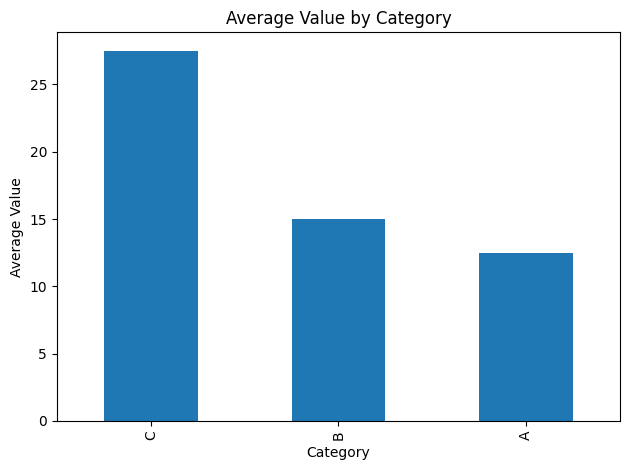

In [32]:
import matplotlib.pyplot as plt

# Group and sort by mean Value
summary = df.groupby('Category')['Value'].mean().sort_values(ascending=False)
print("\nGrouped summary sorted:\n", summary)

# Visualization
summary.plot(kind='bar', title='Average Value by Category')
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.tight_layout()
plt.show()


Section 4.5 – Pivot Tables
Build pivot tables with multiple levels for rows and columns.



Use margins=True to include subtotals in a pivot table.


In [35]:

import pandas as pd
import numpy as np

# Sample data
data = pd.DataFrame({
    'Region': ['North', 'North', 'South', 'South', 'East', 'East'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Quarter': ['Q1', 'Q1', 'Q2', 'Q2', 'Q1', 'Q2'],
    'Sales': [250, 150, 200, 300, 400, 100]
})

# Pivot table with multi-level rows and columns
pivot = pd.pivot_table(
    data, 
    values='Sales', 
    index=['Region', 'Product'], 
    columns='Quarter',
    aggfunc='sum'
)
print("Multi-level pivot table:\n", pivot)

pivot_with_margins = pd.pivot_table(
    data, 
    values='Sales', 
    index='Region', 
    columns='Quarter', 
    aggfunc='sum', 
    margins=True
)
print("\nPivot table with subtotals:\n", pivot_with_margins)


Multi-level pivot table:
 Quarter            Q1     Q2
Region Product              
East   A        400.0    NaN
       B          NaN  100.0
North  A        250.0    NaN
       B        150.0    NaN
South  A          NaN  200.0
       B          NaN  300.0

Pivot table with subtotals:
 Quarter     Q1     Q2   All
Region                     
East     400.0  100.0   500
North    400.0    NaN   400
South      NaN  500.0   500
All      800.0  600.0  1400



Compare pivot tables with groupby and aggregation.


In [36]:
# Groupby alternative to pivot table
grouped = data.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()
print("\nGroupby alternative:\n", grouped)



Groupby alternative:
 Quarter     Q1     Q2
Region               
East     400.0  100.0
North    400.0    NaN
South      NaN  500.0



Write a function to generate customizable pivot tables.


In [37]:
def create_pivot_table(df, values, index, columns=None, aggfunc='sum', margins=False):
    return pd.pivot_table(
        df, 
        values=values, 
        index=index, 
        columns=columns, 
        aggfunc=aggfunc, 
        margins=margins
    )

# Example usage
custom_pivot = create_pivot_table(data, 'Sales', index=['Product'], columns='Quarter', margins=True)
print("\nCustom pivot table:\n", custom_pivot)



Custom pivot table:
 Quarter   Q1   Q2   All
Product                
A        650  200   850
B        150  400   550
All      800  600  1400



Use pivot tables to reshape and visualize sales or time-series data.



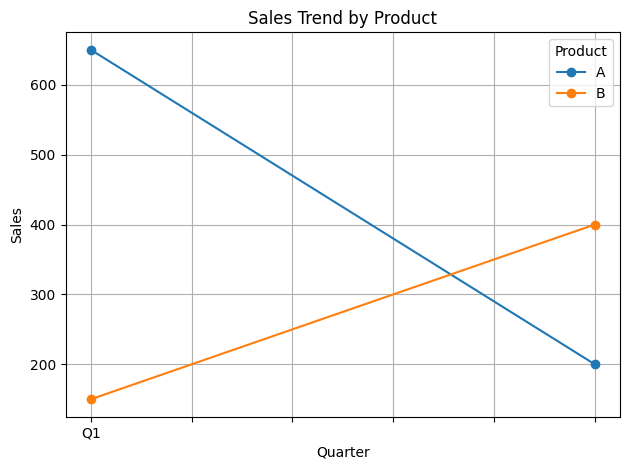

In [38]:
import matplotlib.pyplot as plt

# Pivot to reshape
sales_trend = pd.pivot_table(
    data,
    values='Sales',
    index='Quarter',
    columns='Product',
    aggfunc='sum'
)

# Visualization
sales_trend.plot(marker='o', title='Sales Trend by Product')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


Section– Vectorized String Operations


Clean a column of text data using .str.strip(), .str.lower(), .str.replace().


In [39]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'Name': [' Alice ', 'BOB', ' charlie '],
    'Email': ['ALICE@EXAMPLE.COM', ' BOB@domain.com ', 'CHARLIE@work.ORG']
})

# Clean names and emails
df['Name'] = df['Name'].str.strip().str.lower()
df['Email'] = df['Email'].str.strip().str.lower().str.replace(r'\s+', '', regex=True)
print("Cleaned data:\n", df)


Cleaned data:
       Name              Email
0    alice  alice@example.com
1      bob     bob@domain.com
2  charlie   charlie@work.org



Use regex to extract structured data from strings.


In [40]:
# Extract username and domain from email
df['Username'] = df['Email'].str.extract(r'(^[^@]+)')
df['Domain'] = df['Email'].str.extract(r'@([^\.]+)')
print("\nExtracted components:\n", df)



Extracted components:
       Name              Email Username   Domain
0    alice  alice@example.com    alice  example
1      bob     bob@domain.com      bob   domain
2  charlie   charlie@work.org  charlie     work



Perform filtering based on string patterns.


In [41]:
# Filter emails from 'example.com' domain
filtered = df[df['Email'].str.contains(r'@example\.com$', case=False)]
print("\nFiltered emails from example.com:\n", filtered)



Filtered emails from example.com:
     Name              Email Username   Domain
0  alice  alice@example.com    alice  example



Concatenate string columns and format output.


In [42]:
# Create a custom label
df['Label'] = df['Name'].str.title() + ' <' + df['Email'] + '>'
print("\nFormatted labels:\n", df[['Label']])



Formatted labels:
                         Label
0   Alice <alice@example.com>
1        Bob <bob@domain.com>
2  Charlie <charlie@work.org>



Apply .str.get() and .str.len() to analyze string content.



In [43]:
# First letter of Name and email length
df['First_Char'] = df['Name'].str.get(0)
df['Email_Length'] = df['Email'].str.len()
print("\nString analysis:\n", df[['First_Char', 'Email_Length']])



String analysis:
   First_Char  Email_Length
0          a            17
1          b            14
2          c            16


Section  – Working with Categorical Data


Convert object columns to category dtype and observe memory usage.


In [44]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'City': ['London', 'Paris', 'London', 'Berlin', 'Paris', 'Berlin']
})

# Check memory usage before
print("Before:\n", df.info(memory_usage='deep'))

# Convert to category
df['City'] = df['City'].astype('category')

# Check memory usage after
print("\nAfter:\n", df.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    6 non-null      object
dtypes: object(1)
memory usage: 460.0 bytes
Before:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   City    6 non-null      category
dtypes: category(1)
memory usage: 410.0 bytes

After:
 None



Set and reorder category levels explicitly.


In [ ]:
# Set and reorder categories
df['City'] = df['City'].cat.set_categories(['Berlin', 'Paris', 'London'], ordered=True)
print("\nReordered categories:\n", df['City'])



Reordered categories:
 0    London
1     Paris
2    London
3    Berlin
4     Paris
5    Berlin
Name: City, dtype: category
Categories (3, object): ['Berlin' < 'Paris' < 'London']



Perform comparisons and sorting on categorical columns.


In [49]:
# Sort by ordered category
sorted_df = df.sort_values('City')
print("\nSorted by category:\n", sorted_df)



Sorted by category:
      City
3  Berlin
5  Berlin
1   Paris
4   Paris
0  London
2  London



Group by categorical variables and compute stats.


In [ ]:
# Add a numeric column
df['Sales'] = [100, 200, 150, 120, 220, 130]

# Group by City and compute mean
grouped = df.groupby('City')['Sales'].mean()
print("\nGrouped stats:\n", grouped)



One-hot encoded:
    City_Berlin  City_Paris  City_London
0        False       False         True
1        False        True        False
2        False       False         True
3         True       False        False
4        False        True        False
5         True       False        False



Use pd.get_dummies() to one-hot encode categorical features.



In [48]:
# One-hot encode the City column
encoded = pd.get_dummies(df['City'], prefix='City')
print("\nOne-hot encoded:\n", encoded)



One-hot encoded:
    City_Berlin  City_Paris  City_London
0        False       False         True
1        False        True        False
2        False       False         True
3         True       False        False
4        False        True        False
5         True       False        False


Section  – Time Series: Basics


Create a time-indexed Series and plot it.


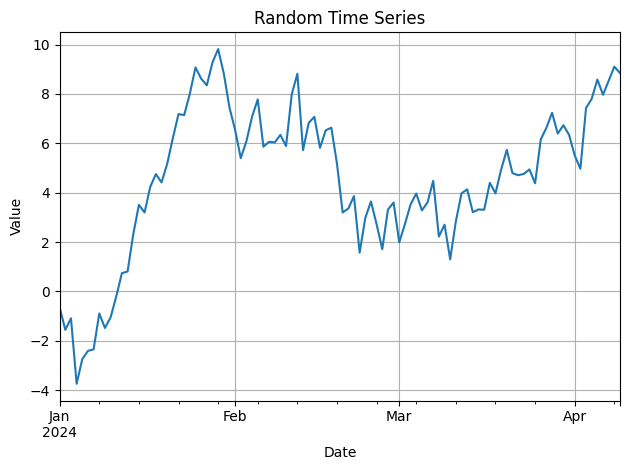

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create date range
dates = pd.date_range(start='2024-01-01', periods=100, freq='D')
data = pd.Series(np.random.randn(100).cumsum(), index=dates)

# Plot
data.plot(title='Random Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()



Slice the time series by date range.


In [51]:
# Slice by date range
jan_data = data['2024-01']
print("\nSliced January data:\n", jan_data.head())



Sliced January data:
 2024-01-01   -0.643753
2024-01-02   -1.556577
2024-01-03   -1.087501
2024-01-04   -3.741146
2024-01-05   -2.740809
Freq: D, dtype: float64



Resample the data to different frequencies.



Monthly resampled data:
 2024-01-31    3.25664
2024-02-29    5.29712
2024-03-31    4.28163
2024-04-30    7.63931
Freq: ME, dtype: float64


/tmp/ipykernel_3356/3956433437.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.resample('M').mean()


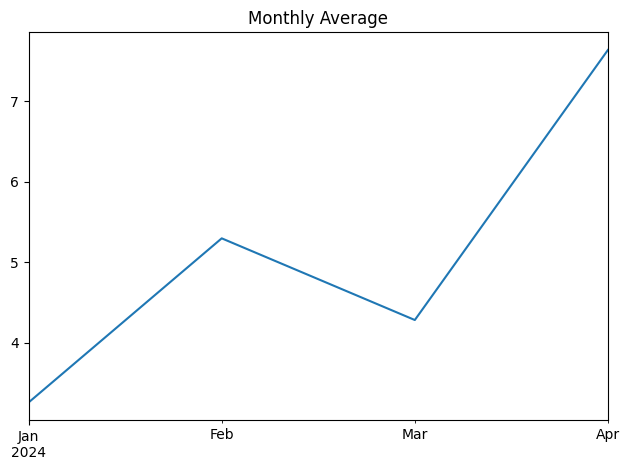

In [52]:
# Resample to monthly frequency (mean)
monthly = data.resample('M').mean()
print("\nMonthly resampled data:\n", monthly)

# Plot resampled data
monthly.plot(title='Monthly Average')
plt.tight_layout()
plt.show()



Compute rolling statistics (mean, std).


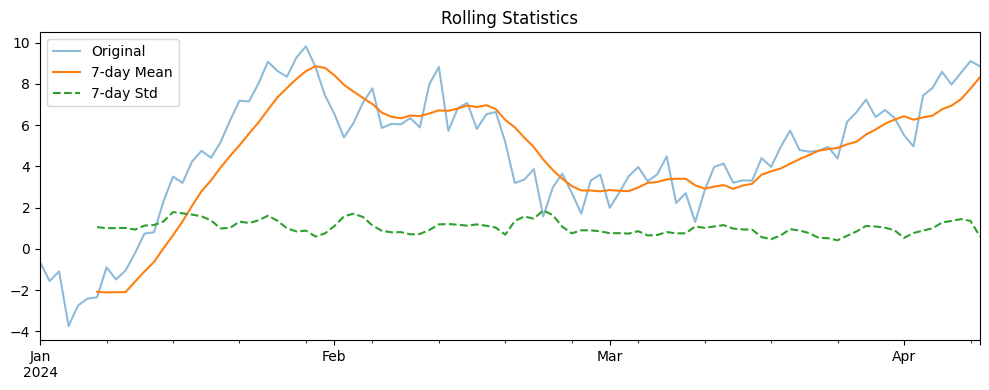

In [53]:
# 7-day rolling mean and std
rolling_mean = data.rolling(window=7).mean()
rolling_std = data.rolling(window=7).std()

# Plot
plt.figure(figsize=(10, 4))
data.plot(label='Original', alpha=0.5)
rolling_mean.plot(label='7-day Mean')
rolling_std.plot(label='7-day Std', linestyle='--')
plt.legend()
plt.title('Rolling Statistics')
plt.tight_layout()
plt.show()



Handle missing time points and perform interpolation.


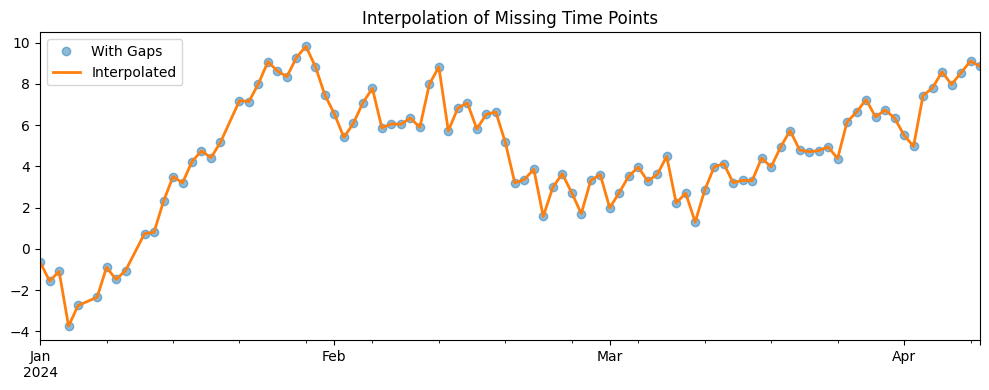

In [54]:
# Introduce missing days
data_missing = data.drop(data.index[[5, 10, 20]])

# Reindex to original full date range
full_range = pd.date_range(start='2024-01-01', periods=100, freq='D')
data_reindexed = data_missing.reindex(full_range)

# Interpolate missing values
data_interp = data_reindexed.interpolate(method='time')

# Compare original and interpolated
plt.figure(figsize=(10, 4))
data_reindexed.plot(label='With Gaps', style='o', alpha=0.5)
data_interp.plot(label='Interpolated', linewidth=2)
plt.legend()
plt.title('Interpolation of Missing Time Points')
plt.tight_layout()
plt.show()


Section – Time Series: Frequencies


Convert between string dates and datetime objects.


In [55]:
import pandas as pd

date_strs = ['2025-01-01', '2025-02-01', '2025-03-01']
date_times = pd.to_datetime(date_strs)
print("Datetime objects:\n", date_times)

Datetime objects:
 DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01'], dtype='datetime64[ns]', freq=None)



Generate time ranges with custom frequency.


In [56]:
custom_range = pd.date_range(start='2025-01-01', periods=6, freq='3H')
print("\nCustom date range:\n", custom_range)


Custom date range:
 DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 03:00:00',
               '2025-01-01 06:00:00', '2025-01-01 09:00:00',
               '2025-01-01 12:00:00', '2025-01-01 15:00:00'],
              dtype='datetime64[ns]', freq='3h')


/tmp/ipykernel_3356/2431609521.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  custom_range = pd.date_range(start='2025-01-01', periods=6, freq='3H')



Demonstrate upsampling and downsampling.


In [57]:
import numpy as np

# Daily time series
ts = pd.Series(np.random.randn(6), index=pd.date_range('2025-01-01', periods=6, freq='D'))

# Upsample to hourly and forward fill
upsampled = ts.resample('H').ffill()

# Downsample to 2-day periods and take mean
downsampled = ts.resample('2D').mean()

print("\nOriginal:\n", ts)
print("\nUpsampled (hourly, ffill):\n", upsampled.head(8))
print("\nDownsampled (2D, mean):\n", downsampled)



Original:
 2025-01-01   -0.196725
2025-01-02    0.149038
2025-01-03   -0.838615
2025-01-04    0.084655
2025-01-05    0.563505
2025-01-06   -1.629130
Freq: D, dtype: float64

Upsampled (hourly, ffill):
 2025-01-01 00:00:00   -0.196725
2025-01-01 01:00:00   -0.196725
2025-01-01 02:00:00   -0.196725
2025-01-01 03:00:00   -0.196725
2025-01-01 04:00:00   -0.196725
2025-01-01 05:00:00   -0.196725
2025-01-01 06:00:00   -0.196725
2025-01-01 07:00:00   -0.196725
Freq: h, dtype: float64

Downsampled (2D, mean):
 2025-01-01   -0.023843
2025-01-03   -0.376980
2025-01-05   -0.532813
Freq: 2D, dtype: float64


/tmp/ipykernel_3356/286289869.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  upsampled = ts.resample('H').ffill()



Use asfreq() to set frequency explicitly.


In [58]:
# Set frequency without filling (may introduce NaNs)
asfreq_ts = ts.asfreq('12H')
print("\nExplicit frequency set with asfreq (12H):\n", asfreq_ts.head())



Explicit frequency set with asfreq (12H):
 2025-01-01 00:00:00   -0.196725
2025-01-01 12:00:00         NaN
2025-01-02 00:00:00    0.149038
2025-01-02 12:00:00         NaN
2025-01-03 00:00:00   -0.838615
Freq: 12h, dtype: float64


/tmp/ipykernel_3356/817361631.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  asfreq_ts = ts.asfreq('12H')



Use asfreq() to set frequency explicitly.


In [ ]:
# Set frequency without filling (may introduce NaNs)
asfreq_ts = ts.asfreq('12H')
print("\nExplicit frequency set with asfreq (12H):\n", asfreq_ts.head())



Apply shifting and differencing operations.



In [60]:
# Shift forward (lead)
shifted = ts.shift(1)

# Difference
differenced = ts.diff()

print("\nShifted:\n", shifted)
print("\nDifferenced:\n", differenced)



Shifted:
 2025-01-01         NaN
2025-01-02   -0.196725
2025-01-03    0.149038
2025-01-04   -0.838615
2025-01-05    0.084655
2025-01-06    0.563505
Freq: D, dtype: float64

Differenced:
 2025-01-01         NaN
2025-01-02    0.345764
2025-01-03   -0.987653
2025-01-04    0.923270
2025-01-05    0.478851
2025-01-06   -2.192636
Freq: D, dtype: float64


Section  – Example: Stock Market Data


Load stock data from CSV or API.


In [64]:
import yfinance as yf
df = yf.download('AAPL', start='2023-01-01', end='2024-12-31')

df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.632530,129.395518,122.742873,128.782649,112117500
2023-01-04,124.907700,127.181268,123.642412,125.431607,89113600
2023-01-05,123.583099,126.301493,123.326093,125.668849,80962700
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700
2023-01-09,128.654129,131.876670,128.397123,128.970458,70790800



Compute daily returns and cumulative returns.


In [65]:
# Daily returns
df['Daily Return'] = df['Close'].pct_change()

# Cumulative returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

print(df[['Close', 'Daily Return', 'Cumulative Return']].head())


Price            Close Daily Return Cumulative Return
Ticker            AAPL                               
Date                                                 
2023-01-03  123.632530          NaN               NaN
2023-01-04  124.907700     0.010314          1.010314
2023-01-05  123.583099    -0.010605          0.999600
2023-01-06  128.130234     0.036794          1.036380
2023-01-09  128.654129     0.004089          1.040617



Plot stock prices and returns over time.


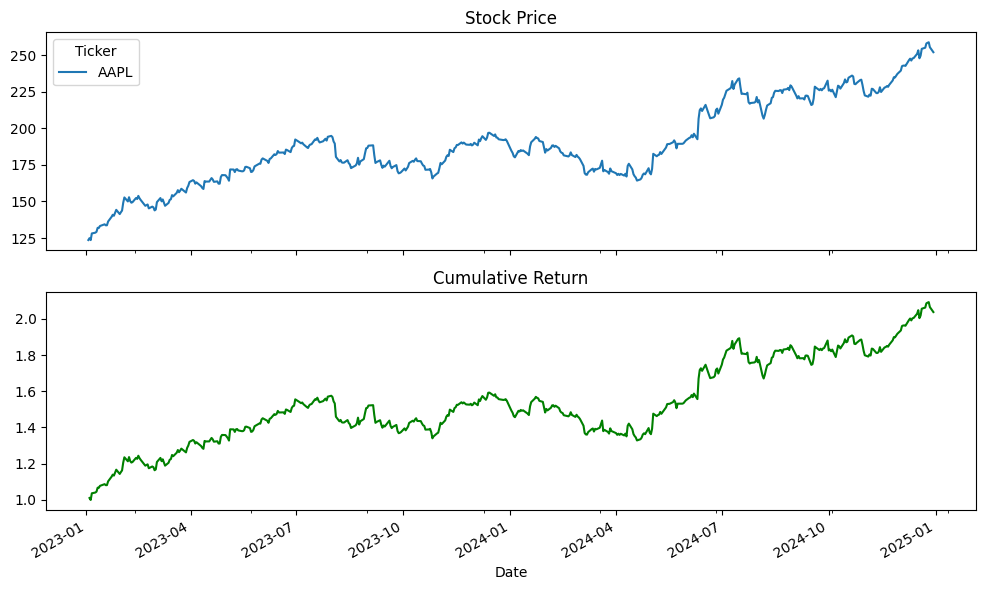

In [66]:
import matplotlib.pyplot as plt

# Plot close price and cumulative return
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

df['Close'].plot(ax=ax[0], title='Stock Price')
df['Cumulative Return'].plot(ax=ax[1], title='Cumulative Return', color='green')

plt.tight_layout()
plt.show()



Compare multiple stocks using subplots.


[*********************100%***********************]  3 of 3 completed


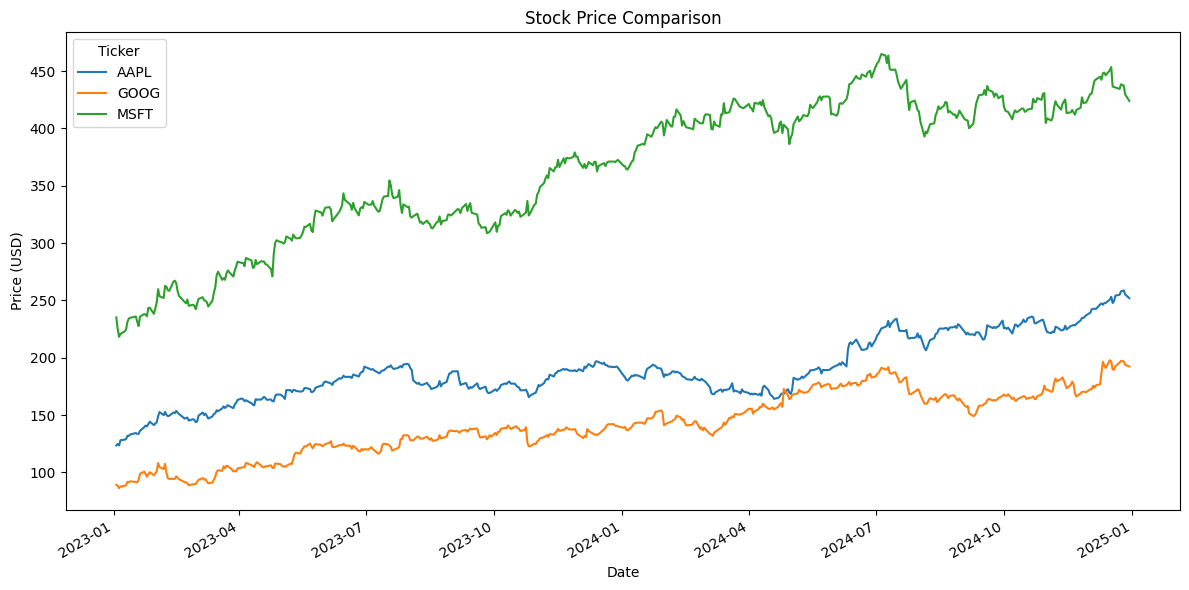

In [69]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOG']
start_date = '2023-01-01'
end_date = '2024-12-31'

# Download data
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Plot closing prices
data.plot(title='Stock Price Comparison', figsize=(12, 6))
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()



Identify and annotate peaks and drops in stock price.



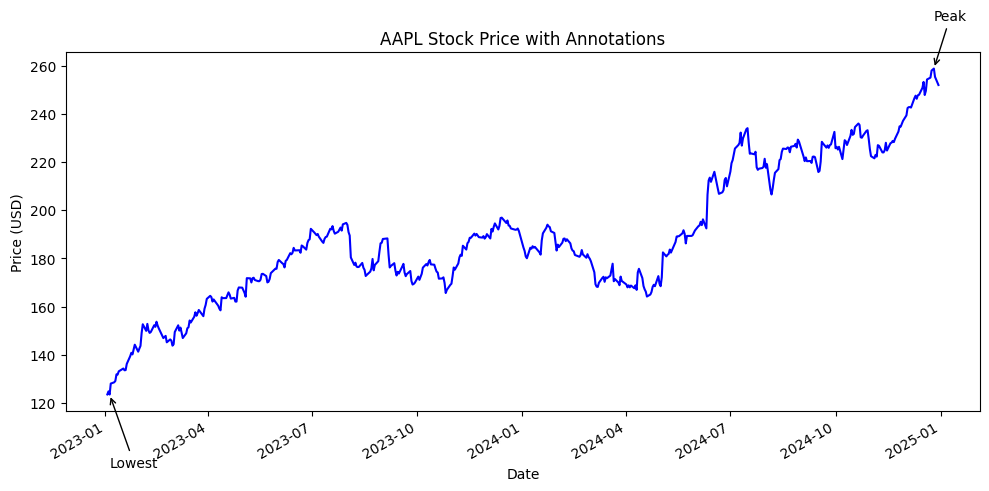

In [70]:
# Choose a single stock for annotation (e.g., AAPL)
aapl = data['AAPL'].dropna()

# Identify peak and lowest point
peak_date = aapl.idxmax()
low_date = aapl.idxmin()

# Plot with annotations
plt.figure(figsize=(10, 5))
aapl.plot(title='AAPL Stock Price with Annotations', color='blue')

# Annotate peak
plt.annotate('Peak',
             xy=(peak_date, aapl.loc[peak_date]),
             xytext=(peak_date, aapl.loc[peak_date] + 20),
             arrowprops=dict(facecolor='green', arrowstyle='->'))

# Annotate low
plt.annotate('Lowest',
             xy=(low_date, aapl.loc[low_date]),
             xytext=(low_date, aapl.loc[low_date] - 30),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


Section  – High-Performance Pandas


Use eval() to perform arithmetic operations on DataFrame columns.


In [71]:
import pandas as pd
import numpy as np

# Sample DataFrame
df = pd.DataFrame({
    'A': np.random.rand(1_000_000),
    'B': np.random.rand(1_000_000)
})

# Use eval for arithmetic operations
df.eval('C = A + B', inplace=True)
print(df.head())


          A         B         C
0  0.226011  0.907392  1.133402
1  0.560837  0.468331  1.029168
2  0.725675  0.927923  1.653598
3  0.447640  0.813577  1.261216
4  0.239033  0.612409  0.851442



Compare performance of eval() vs standard operations.


In [72]:
# Standard operation
%timeit df['D'] = df['A'] + df['B']

# eval operation
%timeit df.eval('E = A + B', inplace=True)


1.4 ms ± 85.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.69 ms ± 179 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)



Use query() to filter large DataFrames efficiently.


In [73]:
# Filter using query
filtered = df.query('A > 0.5 and B < 0.5')
print(filtered.head())


           A         B         C         D         E
1   0.560837  0.468331  1.029168  1.029168  1.029168
8   0.813669  0.105552  0.919221  0.919221  0.919221
9   0.740155  0.075296  0.815450  0.815450  0.815450
14  0.565687  0.349181  0.914867  0.914867  0.914867
15  0.834843  0.346536  1.181379  1.181379  1.181379



Benchmark common operations with %timeit.


In [74]:
# Timing a filter with boolean indexing
%timeit df[(df['A'] > 0.5) & (df['B'] < 0.5)]

# Timing the same with query
%timeit df.query('A > 0.5 and B < 0.5')


6.02 ms ± 335 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.11 ms ± 239 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)



Optimize memory usage using categorical and appropriate numeric dtyp



In [75]:
# Sample DataFrame with object and float64 types
df2 = pd.DataFrame({
    'City': ['NY', 'LA', 'NY', 'SF', 'LA'] * 200_000,
    'Rating': np.random.rand(1_000_000),
    'Votes': np.random.randint(1, 100, size=1_000_000)
})

# Memory before
print("Memory before:", df2.memory_usage(deep=True).sum() / 1e6, "MB")

# Optimize
df2['City'] = df2['City'].astype('category')
df2['Votes'] = pd.to_numeric(df2['Votes'], downcast='unsigned')
df2['Rating'] = pd.to_numeric(df2['Rating'], downcast='float')

# Memory after
print("Memory after:", df2.memory_usage(deep=True).sum() / 1e6, "MB")


Memory before: 67.000132 MB
Memory after: 6.000393 MB
